# Database Log

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Import csv as a df
df = pd.read_csv('test_week_scores.csv', delimiter=',')
df.head()

,Date,Mood Score
0,2019-04-23,87
1,2019-04-24,95
2,2019-04-25,92
3,2019-04-26,95
4,2019-04-27,93


In [8]:
# Convert to SQL
engine = create_engine('sqlite://',echo=False)
df.to_sql('test_week_scores', engine)

engine.execute("SELECT * FROM test_week_scores;").fetchall()

[(0, '2019-04-23', 87),
 (1, '2019-04-24', 95),
 (2, '2019-04-25', 92),
 (3, '2019-04-26', 95),
 (4, '2019-04-27', 93),
 (5, '2019-04-28', 90),
 (6, '2019-04-29', 85)]

In [20]:
# Extract Data
dates = engine.execute("SELECT DATE(Date) FROM test_week_scores;").fetchall()
scores = engine.execute("SELECT [Mood Score] FROM test_week_scores").fetchall()

avg_score = np.mean(scores)
phrase = "Average Score for the Last Seven Days: %i" % (avg_score)
print(phrase)

Average Score for the Last Seven Days: 91


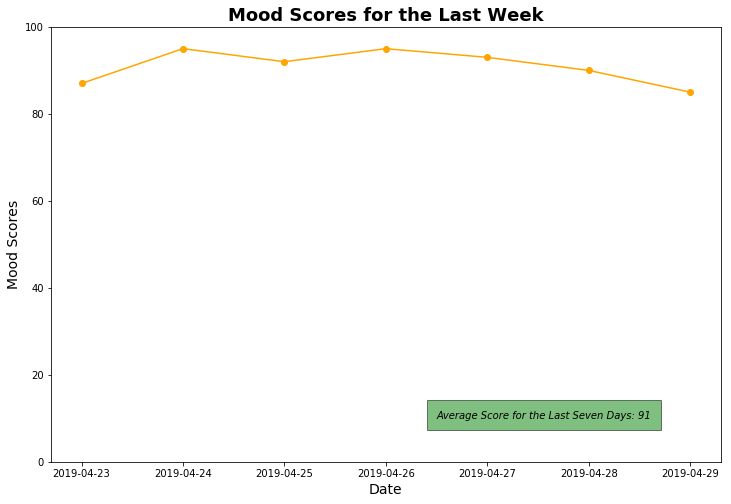

In [21]:
# Plot Log
plt.rcParams['figure.figsize'] = [12, 8]
f, ax = plt.subplots()
ax.plot(df['Date'], scores, '-o', color='orange')
ax.set_title('Mood Scores for the Last Week', fontweight='bold',fontsize=18) 
ax.set_xlabel('Date', fontsize=14);
ax.set_ylabel('Mood Scores', fontsize=14);
ax.set_ylim(0, 100);

ax.text(3.5, 10, phrase, style='italic', bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10});

In [25]:
mp.__version__

'3.0.3'